In [21]:
import os
import json
import pandas as pd

In [22]:
NER_FOLDER = os.getenv("NER_FOLDER")

with open(f"../data/ner/NER.json", 'r') as f:
    data = json.load(f)

In [28]:
final = []
for d in data:
    try:
        id_prop = d['id_prop']
    except:
        continue
    ner = d['ner']
    for n in ner:
        if n['label'] == 'LOC':
            final.append({'id_prop': id_prop, 'loc': n['span']})

df = pd.DataFrame(final)
df_locals = pd.DataFrame(df['loc'].unique(), columns=['local'])

df_locals_classified = pd.read_csv('./output/df_locals_classified.csv', encoding='latin1', delimiter=';')
df_locals_classified['id'] = df_locals_classified['id'].astype(int)
df_local = df_locals.merge(df_locals_classified[['id', 'classification']], left_index=True, right_on='id')
df = df.merge(df_local[['local', 'classification']], left_on='loc', right_on='local')

In [35]:
def classify(x):
    if x == 'regional':
        return 0
    if x == 'national':
        return 1
    return 0
    

df['clf'] = df['classification'].apply(classify)

In [36]:
df

,id_prop,loc,local,classification,clf
0,1006382,Camocim de São Felix,Camocim de São Felix,regional,0
1,1006382,Estado de Pernambuco,Estado de Pernambuco,local,0
2,1006383,Lontras,Lontras,local,0
3,1006383,Santa Catarina,Santa Catarina,local,0
4,1006385,Parque Nacional de São Joaquim,Parque Nacional de São Joaquim,regional,0
...,...,...,...,...,...
105753,996998,Rio de Janeiro,Rio de Janeiro,national,1
105754,997031,Brasil,Brasil,local,0
105755,997032,Rio de janeiro,Rio de janeiro,local,0
105756,997036,Acre,Acre,unknown,0


<Axes: ylabel='Frequency'>

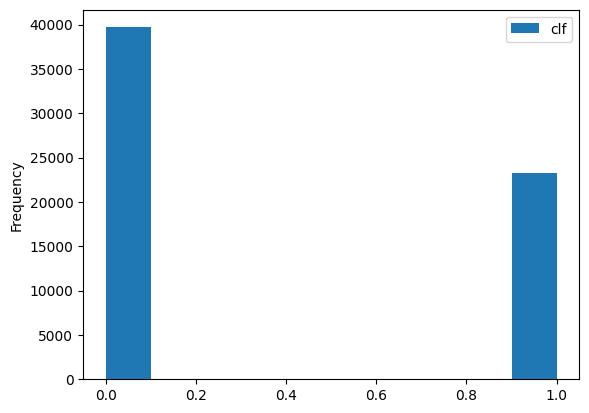

In [37]:
df_classification = df[['id_prop', 'clf']].groupby(['id_prop']).max()
df_classification.plot(kind='hist')

In [38]:
df_classification.to_csv('./output/df_locals_classification_final.csv')